<a href="https://colab.research.google.com/github/MalayGain/Deep-Learning-/blob/main/Comparison_between_Image_classification_using_CNN_and_ANN_on_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import tensorflow as tf
 from tensorflow.keras import datasets, layers, models
 import matplotlib.pyplot as plt
 import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) =datasets.cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [ ]:
Y_train.shape
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:

classes=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

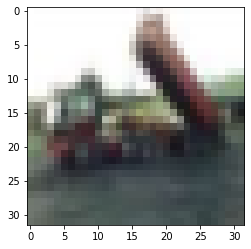

In [ ]:
#X_train[2].shape
#plt.figure(figsize=(5,2))
plt.imshow(X_train[2])
#plt.xlabel(classes[Y_train[2][0]])

In [ ]:
#normalizining  data pixel vales [r,g,b]

X_train=X_train/255
X_test=X_test/255
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [ ]:
 tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

**One Hot encoding of y values**

In [ ]:
from tensorflow import keras

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    Y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    Y_test, num_classes=10, dtype='float32'
)

y_train_categorical[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# ANN

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
get_model().fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8144 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6262 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5413 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4823 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4324 - accuracy: 0.4943


**Measuring CPU vs GPU time for training the model**

In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train, y_train_categorical, epochs=1)

1563/1563 [==============================] - 85s 54ms/step - loss: 1.8103 - accuracy: 0.3569
1 loop, best of 1: 1min 25s per loop


In [ ]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train, y_train_categorical, epochs=1)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.8109 - accuracy: 0.3532
1 loop, best of 1: 11.6 s per loop


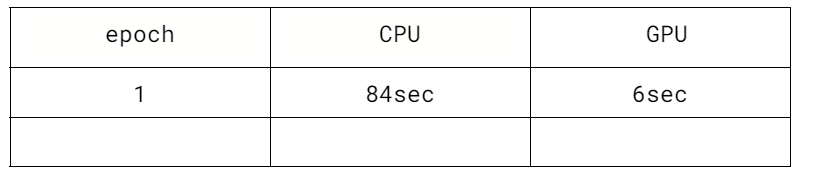

## CNN

In [ ]:
Y_train=Y_train.reshape(-1)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4843 - accuracy: 0.4672
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1331 - accuracy: 0.6033
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9996 - accuracy: 0.6535
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9153 - accuracy: 0.6824
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8510 - accuracy: 0.7052


In [ ]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9389 - accuracy: 0.6766


[0.9389200210571289, 0.6765999794006348]

**So, accuracy in CNN(70%) is much greater than ANN(35%)**


In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.5715213e-03, 5.5774546e-04, 6.8715663e-04, 7.7056527e-01,
        4.5486528e-04, 2.0649014e-01, 5.6383768e-03, 2.0426915e-04,
        1.1287217e-02, 1.5434456e-03],
       [1.6959094e-01, 5.9080648e-01, 2.2111989e-04, 5.3384378e-05,
        1.1480496e-04, 2.7038268e-06, 2.1985709e-06, 5.3294311e-06,
        2.0610523e-01, 3.3097792e-02],
       [2.9833829e-01, 2.4502099e-01, 3.9802762e-03, 4.7651394e-03,
        5.0278422e-03, 7.7277492e-04, 1.8621156e-04, 2.8457418e-03,
        3.9220953e-01, 4.6853181e-02],
       [9.1168404e-01, 1.4018891e-02, 5.1031583e-03, 1.4711244e-03,
        4.1788602e-03, 3.6194106e-05, 2.2040491e-04, 1.4847255e-04,
        6.2471561e-02, 6.6729588e-04],
       [2.3079101e-05, 3.8813837e-04, 1.0962582e-01, 7.2214961e-02,
        2.7070859e-01, 3.6962584e-02, 5.0624269e-01, 2.2010244e-03,
        1.5731836e-03, 5.9953018e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [ ]:
y_test=Y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report :\n",classification_report(y_test,y_classes))

Classification report :
               precision    recall  f1-score   support

           0       0.70      0.77      0.74      1000
           1       0.72      0.87      0.79      1000
           2       0.50      0.68      0.58      1000
           3       0.53      0.46      0.49      1000
           4       0.71      0.48      0.58      1000
           5       0.55      0.63      0.59      1000
           6       0.76      0.76      0.76      1000
           7       0.76      0.71      0.73      1000
           8       0.85      0.72      0.78      1000
           9       0.80      0.70      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
cm=confusion_matrix(y_test,y_classes)

Text(33.0, 0.5, 'Truth')

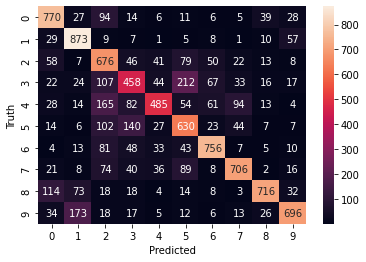

In [ ]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 64)               